EJEMPLO WINDSURF CON MATRIZ DE CONFUSIÓN

🧾 Posibles condiciones:
Nublado, Calmo ➡ ❌ No practicar
Nublado, Ventoso ➡ ❌ No practicar
Soleado, Calmo ➡ ❌ No practicar
Soleado, Ventoso ➡ 🏄 Windsurf!


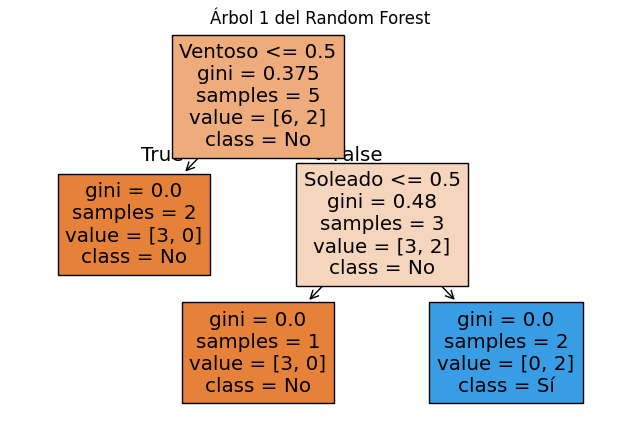

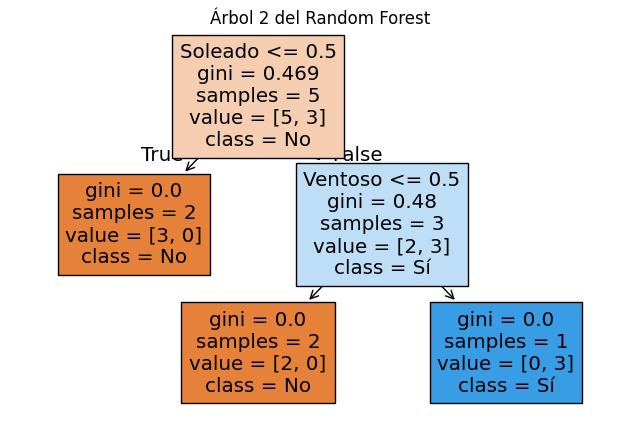

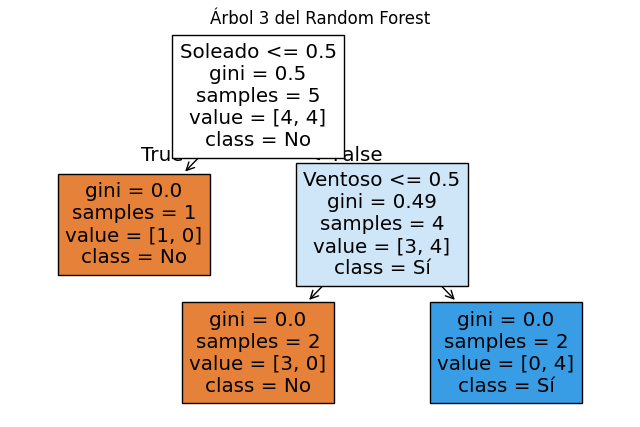

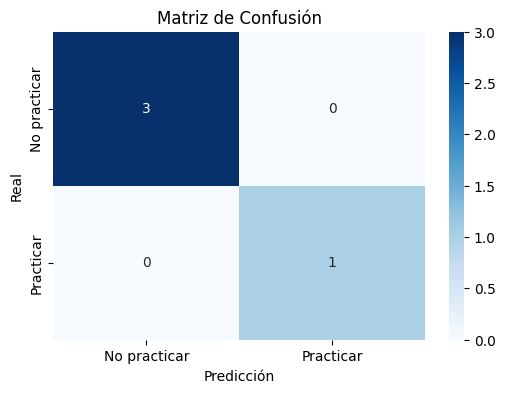

In [12]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Datos de entrenamiento
X = np.array([
    [1, 1],
    [1, 0],
    [0, 1],
    [0, 0],
    [1, 1],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([1, 0, 0, 0, 1, 0, 0, 1])  # etiquetas: 1 practicar, 0 no practicar

# Entrenamos el modelo
clf = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=42)
clf.fit(X, y)

# Casos de prueba
X_test = np.array([
    [0, 0],  # Nublado, Calmo
    [0, 1],  # Nublado, Ventoso
    [1, 0],  # Soleado, Calmo
    [1, 1]   # Soleado, Ventoso
])

# Estas serían las etiquetas reales si vos ya sabés la respuesta:
# (esto es un ejemplo, reemplazalo si tenés valores reales)
y_test = np.array([0, 0, 0, 1])  # por ejemplo

# Predicciones
y_pred = clf.predict(X_test)

# Mostrar resultados en texto
print("🧾 Posibles condiciones:")
for cond, res in zip(X_test, y_pred):
    sol = "Soleado" if cond[0] else "Nublado"
    ven = "Ventoso" if cond[1] else "Calmo"
    act = "🏄 Windsurf!" if res else "❌ No practicar"
    print(f"{sol}, {ven} ➡ {act}")

# Mostrar los árboles del bosque
for i, individual_tree in enumerate(clf.estimators_):
    plt.figure(figsize=(8, 5))
    tree.plot_tree(individual_tree, filled=True, feature_names=['Soleado', 'Ventoso'], class_names=['No', 'Sí'])
    plt.title(f"Árbol {i + 1} del Random Forest")
    plt.show()

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No practicar', 'Practicar'], yticklabels=['No practicar', 'Practicar'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


Matriz de Confusión: Basicamente nos hace un cuadro comparativo para que observemos cuales predicciones fueron correctas y cuales no. Es como el tipico cuadro de los falsos positivos, los falsos negativos, y los dos casos correctos.